# Basic Statistics Case Study

In [395]:
# Import the necessary libraries (pandas, numpy)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style= 'ticks')

# for hypothesis testing
import scipy.stats as stats

# to remove warnings
import warnings
warnings.filterwarnings('ignore')

## BUSINESS PROBLEM-1

In [396]:
# Reading the files

Loan_data = pd.read_csv(r'C:\Users\91896\OneDrive\Desktop\AnalytixLabs\PYTHON ASSIGNMENT AND CASE STUDIES\PYTHON CASE STUDIES\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\LoansData.csv')

In [397]:
Loan_data


,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [398]:
# checking shape of df
Loan_data.shape

(2500, 14)

In [399]:
# checking datatypes
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [400]:
# checking for null values
Loan_data.isna().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

In [401]:
# checking for duplicate values in the df
Loan_data.duplicated().sum()

0

### Data Preparation

In [402]:
# Renaming column names
Loan_data.columns = Loan_data.columns.str.replace('.','_')

In [403]:
Loan_data.head(3)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years


In [404]:
# replacing the % sign and changing datatype of below column
Loan_data['Interest_Rate'] =Loan_data.Interest_Rate.str.replace('%','').apply(pd.to_numeric)

In [405]:
# replacing the % sign and changing datatype of below column
Loan_data['Debt_To_Income_Ratio'] =Loan_data.Debt_To_Income_Ratio.str.replace('%','').apply(pd.to_numeric)

In [406]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Amount_Funded_By_Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   float64
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   float64
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2498 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revolving_CREDIT_Balance        2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [407]:
# we will fill the null values in the above df for hypothesis testing

Loan_data['Amount_Requested'].fillna(round(Loan_data['Amount_Requested'].mean(),1), inplace=True)
Loan_data['Amount_Funded_By_Investors'].fillna(round(Loan_data['Amount_Funded_By_Investors'].mean(),2), inplace=True)
Loan_data['Interest_Rate'].fillna(round(Loan_data['Interest_Rate'].mean(),2), inplace=True)
Loan_data['FICO_Range'].fillna('670-674', inplace=True)
Loan_data['Home_Ownership'].fillna('MORTGAGE', inplace=True)

In [408]:
# dropping the column employment length because of no use and leaving all other columns as it is because of no use in further analysis

Loan_data.drop(columns='Employment_Length', inplace=True)

In [409]:
Loan_data.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0
2,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0
3,10000.0,9975.0,9.99,36 months,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0
4,12000.0,12000.0,11.71,36 months,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0


### Using lending club loans data, the team would like to test below hypothesis on how different factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)
### a. Interest rate is varied for different loan amounts (Less interest charged for high loan amounts)


In [410]:
# Define the hypothesis

# Null Hypothesis (H0): Interest rate does not vary for different loan amounts (Less interest is not charged for high loan amounts)

# Alternate Hypothesis (Ha): Interest rate is varied for different loan amounts (Less interest charged for high loan amounts)

# CI(Confidence Interval): 95%

# Significance of value (p-value) - (1-CI) - 5% (0.05)

In [411]:
Loan_data.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months'],
      dtype='object')

In [412]:
# Here we have 2 numerical variable, so to find the relationship b/w them we will use Correlation

Loan_data[['Amount_Funded_By_Investors','Interest_Rate']].corr()

,Amount_Funded_By_Investors,Interest_Rate
Amount_Funded_By_Investors,1.000000,0.337427
Interest_Rate,0.337427,1.000000


*From above we can see that, there is positive correlation b/w both the columns, so we can say that the interest rate varies for different loan amounts. means with the increase in fund amount, interest rates also increases.* 

In [413]:
# Now we will perform pearson correlation test.

stats.pearsonr(Loan_data['Interest_Rate'],Loan_data['Amount_Funded_By_Investors'])

PearsonRResult(statistic=0.33742694544954227, pvalue=1.276067529181041e-67)

### Business Conclusion:

*defined p-value= 0.05*

*Revised p-value is very very small*

*revised p-value= 1.276067529181041e-67 equivalent to 0.00000000000000000000000000000000000000000000000000000000000000000012761*

*Since the revised p-value < defined p-value , So probability of H0 becoming True decreases.
And hence we fail to reject alternate hypothesis(Ha)*

*Therefore, we can claim that interest rate is varied for different loan amounts i.e(Less interest charged for high loan amounts).*


### b. Loan length is directly effecting intrest rate.

In [414]:
Loan_data.head(3)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0
2,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0


In [415]:
# Define the hypothesis

# Null Hypothesis (H0): Loan length is not effecting the interest rate

# Alternate Hypothesis (Ha): Loan length is directly effecting the interest rate.

# CI(Confidence Interval): 95%

# Significance of value (p-value)- 5% (0.05)

In [416]:
# Here we have to compare means of two independent samples  i.e - 36 months and 50 months
Loan_data.Loan_Length.value_counts()

36 months    1952
60 months     548
Name: Loan_Length, dtype: int64

In [417]:
# 36 month interest rate

loan_36month = Loan_data.loc[Loan_data['Loan_Length']=='36 months','Interest_Rate']
loan_36month

0        8.90
1       12.12
3        9.99
4       11.71
5       15.31
        ...  
2492    10.08
2494    14.65
2497    13.99
2498    12.42
2499    13.79
Name: Interest_Rate, Length: 1952, dtype: float64

In [418]:
# 60 month interest rate
loan_60month = Loan_data.loc[Loan_data['Loan_Length']=='60 months','Interest_Rate']
loan_60month

2       21.98
7       17.14
12      21.67
15      15.65
17      10.37
        ...  
2472    22.45
2479    15.80
2493    23.28
2495    16.77
2496    14.09
Name: Interest_Rate, Length: 548, dtype: float64

In [419]:
# display the average Interest rate by both samples

print("The average interest rate for 36 month loan_length is ",loan_36month.mean())
print("The average interest rate for 60 month loan_length is ",loan_60month.mean())

The average interest rate for 36 month loan_length is  12.127146516393443
The average interest rate for 60 month loan_length is  16.407463503649634


In [420]:
# Perform the T-test independent

stats.ttest_ind(loan_36month,loan_60month)


Ttest_indResult(statistic=-23.410458709272653, pvalue=9.555388366810047e-110)

### Business Conclusion:

*defined p-value= 0.05*

*Revised p-value is very very small*

*revised p-value= 9.555388366810047e-110* 

*Since the revised p-value < defined p-value , so probability of H0 becoming True decreases.
Hence we fail to reject alternate hypothesis(Ha)*

*Therefore, we can claim that loan length is directly effecting the intrest rate.*



### c. Intrest rate varies for different purpose of loans

In [421]:
# Define the hypothesis

# Null Hypothesis (H0): Interest rate does not vary for different purpose of loans (u1=u2=u3=...=un)

# Alternate Hypothesis (Ha): Interest rate varies for different purpose of loans (atleast one of the mean is different from the other means)

# CI(Confidence Interval): 95%

# Significance of value (p-value)- 5% (0.05)

In [422]:
Loan_data.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months'],
      dtype='object')

In [423]:
# following are different purposes of loans, and there are almost 14 reasons for which people are getting loans
Loan_data.Loan_Purpose.value_counts()

debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

In [426]:
debt_consolidation = Loan_data.loc[Loan_data['Loan_Purpose']=='debt_consolidation','Interest_Rate']
credit_card = Loan_data.loc[Loan_data['Loan_Purpose']=='credit_card','Interest_Rate']
other = Loan_data.loc[Loan_data['Loan_Purpose']=='other','Interest_Rate']
home_improvement = Loan_data.loc[Loan_data['Loan_Purpose']=='home_improvement','Interest_Rate']
major_purchase = Loan_data.loc[Loan_data['Loan_Purpose']=='major_purchase','Interest_Rate']
small_business = Loan_data.loc[Loan_data['Loan_Purpose']=='small_business','Interest_Rate']
car = Loan_data.loc[Loan_data['Loan_Purpose']=='car','Interest_Rate']
wedding = Loan_data.loc[Loan_data['Loan_Purpose']=='wedding','Interest_Rate']
medical = Loan_data.loc[Loan_data['Loan_Purpose']=='medical','Interest_Rate']
moving = Loan_data.loc[Loan_data['Loan_Purpose']=='moving','Interest_Rate']
vacation = Loan_data.loc[Loan_data['Loan_Purpose']=='vacation','Interest_Rate']
house = Loan_data.loc[Loan_data['Loan_Purpose']=='house','Interest_Rate']
educational = Loan_data.loc[Loan_data['Loan_Purpose']=='educational','Interest_Rate']
renewable_energy = Loan_data.loc[Loan_data['Loan_Purpose']=='renewable_energy','Interest_Rate']

In [427]:
debt_consolidation.head()

0     8.90
1    12.12
2    21.98
3     9.99
6     7.90
Name: Interest_Rate, dtype: float64

In [428]:
credit_card.head()

4     11.71
7     17.14
8     14.33
9      6.91
18     9.76
Name: Interest_Rate, dtype: float64

In [429]:
other.head()

5     15.31
28     8.59
48     7.49
51    17.44
57     9.99
Name: Interest_Rate, dtype: float64

In [430]:
house.head()

43     21.74
339    22.47
369    13.11
536    15.21
806     9.63
Name: Interest_Rate, dtype: float64

In [431]:
educational.head()

59      8.59
300    18.67
401    12.29
940    12.61
974    13.48
Name: Interest_Rate, dtype: float64

In [432]:
# display the average Interest rate by different purposes of loans

print("The average interest rate for debt_consolidation loan :",debt_consolidation.mean())
print("The average interest rate for credit_card loan :",credit_card.mean())
print("The average interest rate for other loan :",other.mean())
print("The average interest rate for home_improvement loan :",home_improvement.mean())
print("The average interest rate for major_purchase loan :",major_purchase.mean())
print("The average interest rate for small_business loan :",small_business.mean())
print("The average interest rate for car loan :",car.mean())
print("The average interest rate for wedding loan :",wedding.mean())
print("The average interest rate for medical loan :",medical.mean())
print("The average interest rate for moving loan :",moving.mean())
print("The average interest rate for vacation loan :",vacation.mean())
print("The average interest rate for house loan :",house.mean())
print("The average interest rate for educational loan :",educational.mean())
print("The average interest rate for renewable_energy loan :",renewable_energy.mean())

The average interest rate for debt_consolidation loan : 13.58691660290742
The average interest rate for credit_card loan : 13.050698198198198
The average interest rate for other loan : 13.15955223880597
The average interest rate for home_improvement loan : 11.594276315789473
The average interest rate for major_purchase loan : 10.797821782178216
The average interest rate for small_business loan : 12.83919540229885
The average interest rate for car loan : 11.113000000000001
The average interest rate for wedding loan : 12.073333333333334
The average interest rate for medical loan : 11.649666666666667
The average interest rate for moving loan : 13.621034482758622
The average interest rate for vacation loan : 11.966190476190476
The average interest rate for house loan : 13.447999999999999
The average interest rate for educational loan : 11.007333333333332
The average interest rate for renewable_energy loan : 9.8775


In [433]:
# We have to compare means of more than 2 groups, so we will use Anova test or F-test oneway

stats.f_oneway(debt_consolidation,credit_card,other,home_improvement,major_purchase,small_business,car,wedding,medical,moving,
              vacation,house,educational,renewable_energy)

F_onewayResult(statistic=7.48259476705446, pvalue=1.1602506809075995e-14)

### Business Conclusion:

*defined p-value= 0.05*

*Revised p-value is very very small*

*revised p-value= 1.1602506809075995e-14 equivalent to 0.00000000000001160251*

*Since the revised p-value < defined p-value , so probability of H0 becoming True decreases.
Hence we fail to reject alternate hypothesis(Ha)*

*Therefore, we can claim that interest rate varies for different purpose of loans.*


### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [434]:
Loan_data.head(3)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0
2,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0


In [435]:
# Taking mean of Fico_Range column and converting it to numerical variable

Loan_data['FICO_Score'] = ((Loan_data.FICO_Range.str[0:3].astype(int))+(Loan_data.FICO_Range.str[4:].astype(int)))/2

In [436]:
Loan_data.head(3)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,FICO_Score
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,737.0
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,717.0
2,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,692.0


In [437]:
# there are 5 types of Home_Ownership
Loan_data.Home_Ownership.value_counts()

MORTGAGE    1148
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home_Ownership, dtype: int64

In [438]:
# Define the hypothesis

# Null Hypothesis (H0): There is no relationship between FICO scores and Home Ownership

# Alternate Hypothesis (Ha): There is relationship between FICO scores and Home Ownership.

# CI(Confidence Interval): 95%

# Significance of value (p-value)- 5% (0.05)

In [439]:
# Now we have numerical and categorical variable having more than two groups/categories
# So we will perform ANOVA test/F-test one way

In [440]:
MORTGAGE = Loan_data.loc[Loan_data['Home_Ownership']=='MORTGAGE','FICO_Score']
RENT = Loan_data.loc[Loan_data['Home_Ownership']=='RENT','FICO_Score']
OWN = Loan_data.loc[Loan_data['Home_Ownership']=='OWN','FICO_Score']
OTHER = Loan_data.loc[Loan_data['Home_Ownership']=='OTHER','FICO_Score']
NONE = Loan_data.loc[Loan_data['Home_Ownership']=='NONE','FICO_Score']

In [441]:
MORTGAGE.head()

0    737.0
1    717.0
2    692.0
3    697.0
7    707.0
Name: FICO_Score, dtype: float64

In [442]:
RENT.head()

4     697.0
6     722.0
8     687.0
9     717.0
10    672.0
Name: FICO_Score, dtype: float64

In [443]:
OTHER

294     657.0
978     677.0
1484    682.0
2102    672.0
2418    682.0
Name: FICO_Score, dtype: float64

In [444]:
# Perform the F-Test-Oneway

stats.f_oneway(MORTGAGE,RENT,OWN,OTHER,NONE)

F_onewayResult(statistic=19.330308155159962, pvalue=1.1227031714003807e-15)

### Business Conclusion:

*defined p-value= 0.05*

*Revised p-value is very very small*

*revised p-value= 1.1227031714003807e-15 equivalent to 0.0000000000000011227*

*Since the revised p-value < defined p-value , so probability of H0 becoming True decreases.
Hence we fail to reject alternate hypothesis(Ha)*

*Therefore we can claim that there is relationship between FICO scores and Home Ownership means people owning home will have high FICO scores.*

## BUSINESS PROBLEM - 2

In [445]:
# Reading the files

Price_quotes = pd.read_csv(r'C:\Users\91896\OneDrive\Desktop\AnalytixLabs\PYTHON ASSIGNMENT AND CASE STUDIES\PYTHON CASE STUDIES\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\Price_Quotes.csv')

In [446]:
Price_quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [447]:
Price_quotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 420.0 bytes


In [448]:
# checking for null values
Price_quotes.isna().sum()

Order_Number    0
Barry_Price     0
Mary_Price      0
dtype: int64

In [449]:
# checking for duplicate values
Price_quotes.duplicated().sum()

0

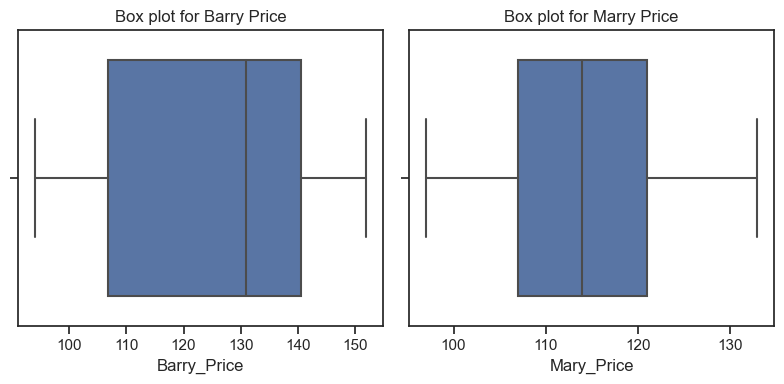

In [450]:
# checking for outliers

fig,axs= plt.subplots(1,2,figsize=(8,4))
sns.boxplot(x= Price_quotes['Barry_Price'],ax=axs[0])
sns.boxplot(x= Price_quotes['Mary_Price'],ax=axs[1])
axs[0].set_title('Box plot for Barry Price')
axs[1].set_title('Box plot for Marry Price')
plt.tight_layout()
plt.show()

###  We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

In [451]:
# Define the hypothesis

# Null Hypothesis (H0): There is no significant difference b/w the average prices quote by pricing experts.

# Alternate Hypothesis (Ha): There is a significant difference b/w the average prices quote by pricing experts.

# CI(Confidence Interval): 95%

# Significance of value (p-value)- 5% (0.05)

In [452]:
Barry_avg = round(Price_quotes['Barry_Price'].mean(),2)
Barry_avg

124.33

In [453]:
Mary_avg = Price_quotes['Mary_Price'].mean()
Mary_avg 

114.75

In [454]:
print("The average price quoted by Barry is ",Barry_avg.mean())
print("The average price quoted by Mary is ",Mary_avg.mean())


The average price quoted by Barry is  124.33
The average price quoted by Mary is  114.75


In [455]:
# Here we will perform T-Test independent because both the prices quoted by experts are independent over each other

stats.ttest_ind(Price_quotes['Barry_Price'],Price_quotes['Mary_Price'])

Ttest_indResult(statistic=1.4147436739281787, pvalue=0.17114226132118285)

### Business Conclusion:

*defined p-value= 0.05*

*Revised p-value is greater than defined p-value*

*revised p-value= 0.17114226132118285*

*Since the revised p-value > defined p-value , so probability of H0 becoming True increases. And hence we fail to reject null hypothesis(H0)*

*Therefore, we can claim that there is no significant difference b/w the average prices quote by pricing experts (Barry and Mary) with the given sample.*


## BUSINESS PROBLEM - 3

In [456]:
# Reading the files

Treatment = pd.read_csv(r'C:\Users\91896\OneDrive\Desktop\AnalytixLabs\PYTHON ASSIGNMENT AND CASE STUDIES\PYTHON CASE STUDIES\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\Treatment_Facility.csv')

In [457]:
Treatment

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [458]:
Treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   VAR4               20 non-null     float64
 4   VAR5               20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 932.0+ bytes


In [459]:
# checking for null values
Treatment.isna().sum()

Month                0
Reengineer           0
Employee_Turnover    0
VAR4                 0
VAR5                 0
dtype: int64

In [460]:
# checking for duplicate values
Treatment.duplicated().sum()

0

In [461]:
# Renaming the columns
Treatment.rename(columns={'VAR4':'TRFF','VAR5':'CI'}, inplace=True)

In [462]:
Treatment.head(3)

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830


### Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

### a) Is there any effect of reengineering effort on staff turnover?


In [463]:
# Define the hypothesis

# Null Hypothesis (H0): There is no effect of reengineering effort on staff turnover.

# Alternate Hypothesis (Ha): There is an effect of reengineering effort on staff turnover.

# CI(Confidence Interval): 99%

# Significance of value (p-value)- 1% (0.01)

In [464]:
Treatment.columns

Index(['Month', 'Reengineer', 'Employee_Turnover', 'TRFF', 'CI'], dtype='object')

In [465]:
Treatment.Reengineer.value_counts()

Prior    13
Post      7
Name: Reengineer, dtype: int64

In [466]:
prior_turnover = Treatment.loc[Treatment['Reengineer']=='Prior','Employee_Turnover']
prior_turnover 

0      0.0000
1      6.0606
2     12.1212
3      3.3333
4     12.9032
5      9.6774
6     11.7647
7     11.4286
8     23.0769
9     15.0000
10    10.0000
11    26.0870
12    11.1111
Name: Employee_Turnover, dtype: float64

In [467]:
post_turnover = Treatment.loc[Treatment['Reengineer']=='Post','Employee_Turnover']
post_turnover 

13    26.6667
14    17.9487
15    12.8205
16    15.7895
17     0.0000
18    30.7692
19    26.8293
Name: Employee_Turnover, dtype: float64

In [468]:
print('average employee turnover prior reengineering :',prior_turnover.mean())
print('average employee turnover post reengineering :',post_turnover.mean())

average employee turnover prior reengineering : 11.735692307692307
average employee turnover post reengineering : 18.68912857142857


In [469]:
# Perform the test
# we have 2 independent samples of prior and post turnover, so use T-Test independent

stats.ttest_ind(prior_turnover,post_turnover)


Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

### Business Conclusion:

*defined p-value= 0.01*

*Revised p-value is greater than defined p-value*

*revised p-value= 0.09361109345535304*

*Since the revised p-value > defined p-value , so probability of H0 becoming True increases. Hence we fail to reject null hypothesis(H0)*

*Therefore, we can claim that there is no effect of reengineering effort on staff turnover.*

*Hence we cannot say that reengineering effort has changed the staff turnover rate with the given sample.*

### b) Is reengineering effort changed critical incidence rate?


In [470]:
# Define the hypothesis

# Null Hypothesis (H0): There is no change in critical incidence rate with the reengineering effort.

# Alternate Hypothesis (Ha): There is a change in critical incidence rate with the reengineering effort.

# CI(Confidence Interval): 99%

# Significance of value (p-value)- 1% (0.01)

In [471]:
Treatment.columns

Index(['Month', 'Reengineer', 'Employee_Turnover', 'TRFF', 'CI'], dtype='object')

In [472]:
prior_CI = Treatment.loc[Treatment['Reengineer']=='Prior','CI']
prior_CI 

0      42.682927
1      25.806452
2     146.198830
3     110.429448
4      23.952096
5      47.058824
6       0.000000
7      25.000000
8     132.183908
9      16.574586
10     88.757396
11     31.746032
12     10.152284
Name: CI, dtype: float64

In [473]:
post_CI = Treatment.loc[Treatment['Reengineer']=='Post','CI']
post_CI

13    29.126214
14    21.008403
15    34.782609
16    19.900498
17     9.950249
18    25.531915
19    23.148148
Name: CI, dtype: float64

In [475]:
print('average critical incidence rate prior reengineering :',prior_CI.mean())
print('average critical incidence rate post reengineering :',post_CI.mean())

average critical incidence rate prior reengineering : 53.887906321846145
average critical incidence rate post reengineering : 23.34971927988571


In [476]:
# Perform the test
# we have 2 independent samples of prior and post critical incidence rate , so use T-Test independent

stats.ttest_ind(prior_CI,post_CI)

Ttest_indResult(statistic=1.627914425352865, pvalue=0.12091989189884148)

### Business Conclusion:

*defined p-value= 0.01*

*Revised p-value is greater than defined p-value*

*revised p-value= 0.12091989189884148*

*Since the revised p-value > defined p-value , so probability of H0 becoming True increases. Hence we fail to reject null hypothesis(H0)*

*Therefore, we can claim that there is no change in critical incidence rate with the reengineering effort.*

*Hence we cannot say that the reeingineering effort has changed critical incidence rate with the given sample .*

## BUSINESS PROBLEM - 4

In [477]:
# Reading the files

Priority_Asses = pd.read_csv(r'C:\Users\91896\OneDrive\Desktop\AnalytixLabs\PYTHON ASSIGNMENT AND CASE STUDIES\PYTHON CASE STUDIES\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\Priority_Assessment.csv')

In [478]:
Priority_Asses

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [479]:
Priority_Asses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [480]:
# checking for null values
Priority_Asses.isna().sum()

Days        0
Priority    0
dtype: int64

### We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring.

In [482]:
#Define the hypothesis

# Null Hypothesis(H0): Prioritisation system has no effect on job priority.
# (High prioriy jobs are not completed quickly than medium priority jobs, and medium priority jobs are not completed 
# quickly than low priority jobs )

# Alternate Hypothesis(Ha): Prioritisation system has an effect on job priority.
#(High prioriy jobs are completed more quickly than  medium priority jobs, and medium priority jobs are completed 
# more quickly than low priority jobs )

# Confidence Interval(CI) - 95%

# Significance of value (p-value) - 5% (0.05) 

In [483]:
Priority_Asses.head(3)

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High


In [484]:
# Type of priority

Priority_Asses.Priority.value_counts()

High      326
Medium    249
Low        67
Name: Priority, dtype: int64

In [485]:
# So here we have to compare means of more than 2 independent samples, that'y we will perform ANOVA - F-Test-Oneway

High = Priority_Asses.loc[Priority_Asses['Priority']=='High', 'Days']
Medium = Priority_Asses.loc[Priority_Asses['Priority']=='Medium', 'Days']
Low = Priority_Asses.loc[Priority_Asses['Priority']=='Low', 'Days']

In [486]:
High.head()

0    3.3
2    0.3
5    0.3
6    0.3
7    0.3
Name: Days, dtype: float64

In [487]:
Medium.head()

1      7.9
3      0.7
4      8.6
9     15.9
11     0.3
Name: Days, dtype: float64

In [488]:
Low.head()

14    23.2
15     5.3
20     4.6
23     1.8
26    17.0
Name: Days, dtype: float64

In [489]:
print('average of high priority jobs :',High.mean())
print('average of medium priority jobs :',Medium.mean())
print('average of low priority jobs :',Low.mean())

average of high priority jobs : 3.0236196319018402
average of medium priority jobs : 2.5
average of low priority jobs : 4.228358208955224


In [490]:
# Perform the test

stats.f_oneway(High,Medium,Low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

### Business Conclusion:

*defined p-value= 0.05*

*Revised p-value is greater than defined p-value*

*revised p-value= 0.16411459461716182*

*Since the revised p-value > defined p-value , so probability of H0 becoming True increases. Hence we fail to reject null hypothesis(H0)*

*Therefore, we can claim that prioritisation system has no effect on job priority.*

*Hence we cannot say high prioriy jobs are completed more quickly than  medium priority jobs, and medium priority jobs are completed more quickly than low priority jobs with the given sample.*

## BUSINESS PROBLEM - 5

In [491]:
# Reading the files

Films = pd.read_csv(r'C:\Users\91896\OneDrive\Desktop\AnalytixLabs\PYTHON ASSIGNMENT AND CASE STUDIES\PYTHON CASE STUDIES\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\Films.csv')

In [492]:
Films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [493]:
Films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [494]:
# checking for null values
Films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [495]:
Films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [496]:
Films.Movie.value_counts()

Willy Wonka                161
Ferris Buellers Day Off    137
Old School                  32
Name: Movie, dtype: int64

In [497]:
# converting the variables same as male and female 
Films.Gender.value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

In [498]:
# 1 & Male - Male , 2 & Female - Female
Films['Gender'] =np.where((Films.Gender == '1')|(Films.Gender == 'Male'),'Male','Female')

In [499]:
# converted
Films.Gender.value_counts()

Female    213
Male      117
Name: Gender, dtype: int64

In [500]:
# 1 & married - Married , 2 & single - Single
Films.Marital_Status.value_counts()

2          208
1           88
Single      18
Married     12
Slngle       2
Name: Marital_Status, dtype: int64

In [501]:
Films['Marital_Status'] = np.where((Films.Marital_Status == '1')|(Films.Marital_Status == 'Married'),'Married','Single')

In [502]:
Films.Marital_Status.value_counts()

Single     230
Married    100
Name: Marital_Status, dtype: int64

In [503]:
Films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     0
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [504]:
# checking for duplicate values
# 52 rows are duplicate and 278 not duplicate
Films.duplicated().value_counts()

False    278
True      52
dtype: int64

In [505]:
# dateframe after dropping duplicates
Films.shape

(330, 11)

In [506]:
# null values in columns
Films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     0
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [507]:
# imputing null values with mode
for i in Films.columns:
    Films[i]=Films[i].fillna(Films[i].mode()[0])  

In [508]:
Films.isna().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

### Use the survey results to address the following questions

### a) What is the overall level of customer satisfaction?


In [509]:
Films.head(2)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5


In [510]:
# average of overall rating
mean = Films['Overall'].mean()
mean

1.621212121212121

In [511]:
# standard deviation of overall rating
std_dev = Films['Overall'].std()
std_dev

0.6878262202585181

In [512]:
# standard error
Standard_error = std_dev/(np.sqrt(Films.shape[0]))
Standard_error

0.037863587260422576

In [513]:
# lower range
mean-1.96*Standard_error

1.5469994901816928

In [514]:
# upper range
mean+1.96*Standard_error

1.6954247522425494

In [515]:
print(f'With the 95% confidence levels the overall level of customer satisfaction is between range ({mean-(1.96*Standard_error)},{mean+(1.96*Standard_error)})')

With the 95% confidence levels the overall level of customer satisfaction is between range (1.5469994901816928,1.6954247522425494)


*So the overall customer satisfaction is between Good to Excellent*

### b) What factors are linked to satisfaction?


In [516]:
Films.columns

Index(['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

#### we will compare various factors given in the data with Customer overall satisfaction
#### 1st factor - Movie

In [519]:
#Define the hypothesis

# Null Hypothesis(H0): There is no effect of movie on customer satisfaction.

# Alternate Hypothesis(Ha): There is an effect of movie on customer satisfaction.

# Confidence Interval(CI) - 95%

# Significance of value (p-value) - 5% (0.05) 

In [520]:
# 3 unique movies
Films.Movie.value_counts()

Willy Wonka                161
Ferris Buellers Day Off    137
Old School                  32
Name: Movie, dtype: int64

In [521]:
Willy_Wonka = Films.loc[Films['Movie']=='Willy Wonka','Overall']
Ferris_Buellers_Day_Off = Films.loc[Films['Movie']=='Ferris Buellers Day Off','Overall']
Old_School = Films.loc[Films['Movie']=='Old School','Overall']

In [522]:
Willy_Wonka.head()

137    2.0
138    2.0
139    1.0
140    1.0
141    1.0
Name: Overall, dtype: float64

In [523]:
Ferris_Buellers_Day_Off.head()

0    2.0
1    1.0
2    2.0
3    2.0
4    1.0
Name: Overall, dtype: float64

In [524]:
Old_School.head()

298    1.0
299    1.0
300    1.0
301    1.0
302    5.0
Name: Overall, dtype: float64

In [525]:
print('Average overall customer satisfaction with Willy_Wonka movie :',Willy_Wonka.mean())
print('Average overall customer satisfaction with Ferris_Buellers_Day_Off movie :',Ferris_Buellers_Day_Off.mean())
print('Average overall customer satisfaction with Old_School movie :',Old_School.mean())

Average overall customer satisfaction with Willy_Wonka movie : 1.6273291925465838
Average overall customer satisfaction with Ferris_Buellers_Day_Off movie : 1.6569343065693432
Average overall customer satisfaction with Old_School movie : 1.4375


In [526]:
# here we have to compare means of 3 independent groups, so perform ANOVA/ F-Test-Oneway

stats.f_oneway(Willy_Wonka,Ferris_Buellers_Day_Off,Old_School)

F_onewayResult(statistic=1.335243752886233, pvalue=0.2645245972839759)

### Business Conclusion:

*defined p-value= 0.05*

*Revised p-value is greater than defined p-value*

*revised p-value= 0.1540446375562703*

*Since the revised p-value > defined p-value , so probability of H0 becoming True increases. Hence we fail to reject null hypothesis(H0)*

*Therefore, we can claim that there is no effect of movie on customer satisfaction.*

*Hence we cannot say that movie is the factor linked to customer satisfaction with the given sample.*


#### 2nd factor - Gender

In [528]:
# Define the hypothesis

# Null Hypothesis(H0): There is no relationship b/w gender and customer satisfaction.

# Alternate Hypothesis(Ha): There is a relationship b/w gender and customer satisfaction.

# Confidence Interval(CI) - 95%

# Significance of value (p-value) - 5% (0.05) 

In [529]:
Films.Gender.value_counts()

Female    213
Male      117
Name: Gender, dtype: int64

In [530]:
Female = Films.loc[Films['Gender']=='Female','Overall']
Male = Films.loc[Films['Gender']=='Male','Overall']

In [531]:
Female.head()

0    2.0
1    1.0
3    2.0
4    1.0
5    1.0
Name: Overall, dtype: float64

In [532]:
Male.head()

2     2.0
6     2.0
10    2.0
13    5.0
14    1.0
Name: Overall, dtype: float64

In [533]:
print('Average overall female satisfaction :',Female.mean())
print('Average overall male satisfaction :',Male.mean())

Average overall female satisfaction : 1.5821596244131455
Average overall male satisfaction : 1.6923076923076923


In [534]:
# we have 2 independent samples so perform T-Test independent

stats.ttest_ind(Female,Male)

Ttest_indResult(statistic=-1.393621669674226, pvalue=0.16437541932112798)

### Business Conclusion:

*defined p-value= 0.05*

*Revised p-value is greater than defined p-value*

*revised p-value= 0.2937644761222965*

*Since the revised p-value > defined p-value , so probability of H0 becoming True increases. Hence we fail to reject null hypothesis(H0)*

*Therefore, we can claim that there is no relationship b/w gender and customer satisfaction.*

*Hence we cannot say that gender is the factor linked to customer satisfaction with the given sample.*


#### 3rd factor - Marital Status

In [535]:
# Define the hypothesis

# Null Hypothesis(H0): There is no relationship b/w marital status and customer satisfaction.

# Alternate Hypothesis(Ha): There is a relationship b/w marital status and customer satisfaction.

# Confidence Interval(CI) - 95%

# Significance of value (p-value) - 5% (0.05) 

In [536]:
Films.Marital_Status.value_counts()

Single     230
Married    100
Name: Marital_Status, dtype: int64

In [537]:
Single = Films.loc[Films['Marital_Status']=='Single','Overall']
Married = Films.loc[Films['Marital_Status']=='Married','Overall']

In [538]:
Single.head()

1     1.0
7     1.0
8     1.0
9     2.0
12    1.0
Name: Overall, dtype: float64

In [540]:
print('Average overall female satisfaction :',Single.mean())
print('Average overall male satisfaction :',Married.mean())

Average overall female satisfaction : 1.6391304347826088
Average overall male satisfaction : 1.58


In [541]:
# we have 2 independent samples so perform T-Test independent

stats.ttest_ind(Single,Married)

Ttest_indResult(statistic=0.7171640309514444, pvalue=0.47378328196635067)

### Business Conclusion:

*defined p-value= 0.05*

*Revised p-value is greater than defined p-value*

*revised p-value= 0.27890031689423117*

*Since the revised p-value > defined p-value , so probability of H0 becoming True increases. Hence we fail to reject null hypothesis(H0)*

*Therefore, we can claim that there is no relationship b/w marital status and customer satisfaction.*

*Hence we cannot say that marital status is the factor linked to customer satisfaction with the given sample.*


#### 4th factor - Sinage

In [542]:
Films.columns

Index(['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

In [544]:
# Define the hypothesis

# Null Hypothesis(H0): There is no relationship b/w sinage and customer satisfaction.

# Alternate Hypothesis(Ha): There is a relationship b/w sinage and customer satisfaction.

# Confidence Interval(CI) - 95%

# Significance of value (p-value) - 5% (0.05) 

In [545]:
Films.Sinage.value_counts()

2.0    158
1.0    113
3.0     48
4.0      6
5.0      5
Name: Sinage, dtype: int64

In [546]:
# we have to find relationship b/w 2 numerical variable, so use pearson correlation

stats.pearsonr(Films.Sinage,Films.Overall)

PearsonRResult(statistic=0.3821028042239567, pvalue=6.501065434766993e-13)

### Business Conclusion:

*defined p-value= 0.05*

*Revised p-value is very small*

*revised p-value= 1.6219726562227852e-09 equivalent to 0.0000000016220*

*Since the revised p-value < defined p-value , so probability of H0 becoming True decreases.
Hence we fail to reject alternate hypothesis(Ha)*

*Therefore we can claim that there is relationship b/w sinage and customer satisfaction*

*Hence we can say that sinage is an important factor linked to customer satisfaction with the given sample.*


#### 5th factor - Parking

In [547]:
# Define the hypothesis

# Null Hypothesis(H0): There is no relationship b/w parking and customer satisfaction.

# Alternate Hypothesis(Ha): There is a relationship b/w parking and customer satisfaction.

# Confidence Interval(CI) - 95%

# Significance of value (p-value) - 5% (0.05) 

In [273]:
Films.Parking.value_counts()

2.0    128
1.0    111
3.0     28
4.0      7
5.0      4
Name: Parking, dtype: int64

In [548]:
# we have to find relationship b/w 2 numerical variable, so use pearson correlation

stats.pearsonr(Films.Parking,Films.Overall)

PearsonRResult(statistic=0.5144289487855271, pvalue=1.0840276087790176e-23)

### Business Conclusion:

*defined p-value= 0.05*

*Revised p-value is very small*

*revised p-value= 6.216790590954779e-18 equivalent to 0.000000000000000006217*

*Since the revised p-value < defined p-value , so probability of H0 becoming True decreases.
Hence we fail to reject alternate hypothesis(Ha)*

*Therefore we can claim that there is relationship b/w parking and customer satisfaction*

*Hence we can say that parking is an important factor linked to customer satisfaction with the given sample.*


#### 6th factor - Clean

In [549]:
# Define the hypothesis

# Null Hypothesis(H0): There is no relationship b/w cleanliness and customer satisfaction.

# Alternate Hypothesis(Ha): There is a relationship b/w cleanliness and customer satisfaction.

# Confidence Interval(CI) - 95%

# Significance of value (p-value) - 5% (0.05) 

In [550]:
Films.Clean.value_counts()

2.0    155
1.0    144
3.0     24
4.0      5
5.0      2
Name: Clean, dtype: int64

In [551]:
# we have to find relationship b/w 2 numerical variable, so use pearson correlation

stats.pearsonr(Films.Clean,Films.Overall)

PearsonRResult(statistic=0.3508222789070922, pvalue=5.437550007440007e-11)

### Business Conclusion:

*defined p-value= 0.05*

*Revised p-value is very small*

*revised p-value= 8.576881771139232e-08 equivalent to 0.0000000858*

*Since the revised p-value < defined p-value , so probability of H0 becoming True decreases.
Hence we fail to reject alternate hypothesis(Ha)*

*Therefore we can claim that there is relationship b/w cleanliness and customer satisfaction*

*Hence we can say that cleanliness is an important factor linked to customer satisfaction with the given sample.*


#### 7th factor - Age

In [552]:
# Define the hypothesis

# Null Hypothesis(H0): There is no relationship b/w age and customer satisfaction.

# Alternate Hypothesis(Ha): There is a relationship b/w age and customer satisfaction.

# Confidence Interval(CI) - 95%

# Significance of value (p-value) - 5% (0.05) 

In [553]:
# age groups 1= 1-12; 2 = 13-30; 3 = 31-60; 4 = 60+
Films.Age.value_counts()

2.0    177
3.0    117
1.0     26
4.0     10
Name: Age, dtype: int64

In [554]:
Films.columns

Index(['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

In [556]:
AgeGp1 = Films.loc[Films['Age']==1,'Overall']
AgeGp2 = Films.loc[Films['Age']==2,'Overall']
AgeGp3 = Films.loc[Films['Age']==3,'Overall']
AgeGp4 = Films.loc[Films['Age']==4,'Overall']


In [558]:
AgeGp1.head()

19    1.0
35    1.0
37    1.0
58    1.0
60    2.0
Name: Overall, dtype: float64

In [559]:
AgeGp4.head()

2     2.0
3     2.0
10    2.0
11    2.0
27    1.0
Name: Overall, dtype: float64

In [560]:
print('AgeGp1 mean :',AgeGp1.mean())
print('AgeGp2 mean :',AgeGp2.mean())
print('AgeGp3 mean :',AgeGp3.mean())
print('AgeGp4 mean :',AgeGp4.mean())

AgeGp1 mean : 1.5384615384615385
AgeGp2 mean : 1.6779661016949152
AgeGp3 mean : 1.547008547008547
AgeGp4 mean : 1.7


In [561]:
# we have 4 age groups of customer so we will perform ANOVA/ F-Test-Oneway

stats.f_oneway(AgeGp1,AgeGp2,AgeGp3,AgeGp4)

F_onewayResult(statistic=1.0249927945692117, pvalue=0.3816737451872579)

### Business Conclusion:

*defined p-value= 0.05*

*Revised p-value is greater than defined p-value*

*revised p-value= 0.21315278427620798*

*Since the revised p-value > defined p-value , so probability of H0 becoming True increases. Hence we fail to reject null hypothesis(H0)*

*Therefore, we can claim that there is no relationship b/w age and customer satisfaction.*

*Hence we cannot say that age is the factor linked to customer satisfaction with the given sample.*


#### 8th factor - Income

In [562]:
# Define the hypothesis

# Null Hypothesis(H0): There is no relationship b/w income and customer satisfaction.

# Alternate Hypothesis(Ha): There is a relationship b/w income and customer satisfaction.

# Confidence Interval(CI) - 95%

# Significance of value (p-value) - 5% (0.05) 

In [563]:
# Income of customers (1 = Less than $50,000; 2 = $50-$100,000; 3 = $100,000+)
Films.Income.value_counts()

1.0    158
3.0     90
2.0     82
Name: Income, dtype: int64

In [564]:
Income1 = Films.loc[Films['Income']==1,'Overall']
Income2 = Films.loc[Films['Income']==2,'Overall']
Income3 = Films.loc[Films['Income']==3,'Overall']

In [565]:
Income1.head()

0    2.0
1    1.0
2    2.0
3    2.0
7    1.0
Name: Overall, dtype: float64

In [566]:
print('Income1 mean :',Income1.mean())
print('Income2 mean :',Income2.mean())
print('Income3 mean :',Income3.mean())

Income1 mean : 1.639240506329114
Income2 mean : 1.5853658536585367
Income3 mean : 1.6222222222222222


In [567]:
# we have 3 income groups of customer so we will perform ANOVA/ F-Test-Oneway

stats.f_oneway(Income1,Income2,Income3)

F_onewayResult(statistic=0.16488481054397225, pvalue=0.8480618362664597)

### Business Conclusion:

*defined p-value= 0.05*

*Revised p-value is greater than defined p-value*

*revised p-value=0.8388716492692647*

*Since the revised p-value > defined p-value , so probability of H0 becoming True increases. Hence we fail to reject null hypothesis(H0)*

*Therefore, we can claim that there is no relationship b/w income and customer satisfaction.*

*Hence we cannot say that income is the factor linked to customer satisfaction with the given sample.*


#### 9th factor - Hear About

In [568]:
# Define the hypothesis

# Null Hypothesis(H0): There is no relationship b/w hear about and customer satisfaction.

# Alternate Hypothesis(Ha): There is a relationship b/w hear about and customer satisfaction.

# Confidence Interval(CI) - 95%

# Significance of value (p-value) - 5% (0.05) 

In [569]:
Films.columns

Index(['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

In [570]:
#  Customers heard about Films of rock series from various platforms :
# 1 = television; 2 = newspaper; 3 = radio; 4 = website; 5 = word of mouth
Films.Hear_About.value_counts()

5      233
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: Hear_About, dtype: int64

In [571]:
Hear_About_5 = Films.loc[Films['Hear_About']=='5','Overall']
Hear_About_4 = Films.loc[Films['Hear_About']=='4','Overall']
Hear_About_3 = Films.loc[Films['Hear_About']=='3','Overall']
Hear_About_2 = Films.loc[Films['Hear_About']=='2','Overall']
Hear_About_1 = Films.loc[Films['Hear_About']=='1','Overall']
Hear_About_2_5 = Films.loc[Films['Hear_About']=='2,5','Overall']
Hear_About_3_4 = Films.loc[Films['Hear_About']=='3,4','Overall']
Hear_About_4_5 = Films.loc[Films['Hear_About']=='4,5','Overall']
Hear_About_1_5 = Films.loc[Films['Hear_About']=='1,5','Overall']
Hear_About_5_4 = Films.loc[Films['Hear_About']=='5,4','Overall']
Hear_About_3_5 = Films.loc[Films['Hear_About']=='3,5','Overall']

In [572]:
Hear_About_5.head()

0    2.0
1    1.0
2    2.0
3    2.0
5    1.0
Name: Overall, dtype: float64

In [573]:
Hear_About_1_5

60    2.0
Name: Overall, dtype: float64

In [574]:
Hear_About_3.head()

25     2.0
26     2.0
75     2.0
117    1.0
154    1.0
Name: Overall, dtype: float64

In [575]:
print('Income1 mean :',Income1.mean())
print('Income2 mean :',Income2.mean())
print('Income3 mean :',Income3.mean())

Income1 mean : 1.639240506329114
Income2 mean : 1.5853658536585367
Income3 mean : 1.6222222222222222


In [576]:
# we have more than 2  independent groups of customer so we will perform ANOVA/ F-Test-Oneway

stats.f_oneway(Hear_About_1,Hear_About_2,Hear_About_3,Hear_About_4,Hear_About_5,Hear_About_1_5,Hear_About_2_5,Hear_About_3_5,Hear_About_4_5,Hear_About_3_4,Hear_About_5_4)

F_onewayResult(statistic=1.4573975390851377, pvalue=0.15433478299883888)

### Business Conclusion:

*defined p-value= 0.05*

*Revised p-value is greater than defined p-value*

*revised p-value=0.17251301465791738*

*Since the revised p-value > defined p-value , so probability of H0 becoming True increases. Hence we fail to reject null hypothesis(H0)*

*Therefore, we can claim that there is no relationship b/w  hear about and customer satisfaction.*

*Hence we cannot say that hear about is the factor linked to customer satisfaction with the given sample.*


#### Therefore we can say that Sinage, Cleanliness and Parking are the important factor for Customer Satisfaction.

### c) What is the demographic profile of Film on the Rocks patrons?


In [577]:
Films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


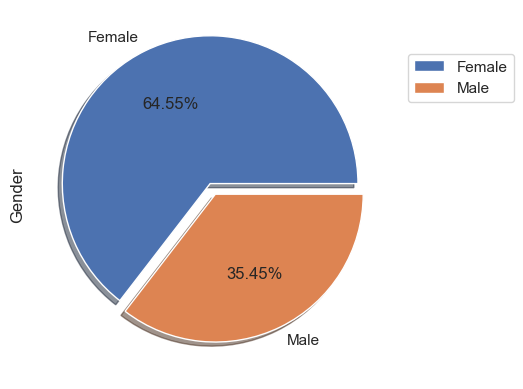

In [578]:
# Demographic profiles
# gender

gender_pie = Films.groupby(by='Gender')[['Gender']].count()
gender_pie.plot(kind='pie',y='Gender',autopct='%1.2f%%',shadow=True,explode=[0.08,0.0])
plt.legend(bbox_to_anchor =(1,0.9))
plt.show()

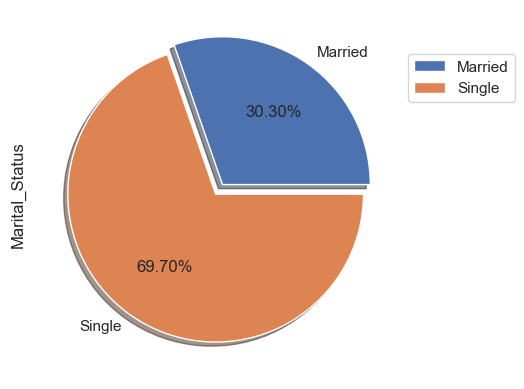

In [579]:
# Marital Status

Marital_Status_pie = Films.groupby(by='Marital_Status')[['Marital_Status']].count()
Marital_Status_pie .plot(kind='pie',y='Marital_Status',autopct='%1.2f%%',shadow=True,explode=[0.08,0.0])
plt.legend(bbox_to_anchor =(1,0.9))
plt.show()

In [580]:
Films.columns

Index(['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

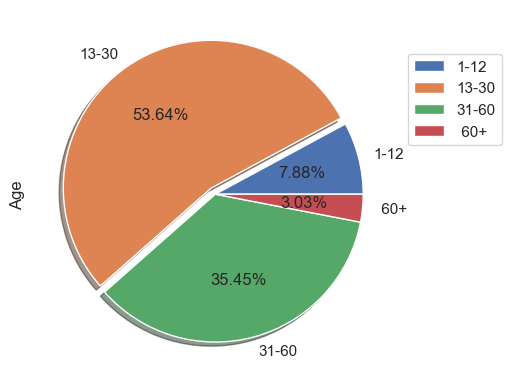

In [581]:
# Age groups

Age_Gp_pie = Films.groupby(by='Age')[['Age']].count()
Age_Gp_pie.plot(kind='pie',y='Age',labels=['1-12','13-30', '31-60',' 60+'],autopct='%1.2f%%',shadow=True,explode=[0.0,0.05,0.0,0.0])
plt.legend(bbox_to_anchor =(1,0.9))
plt.show()

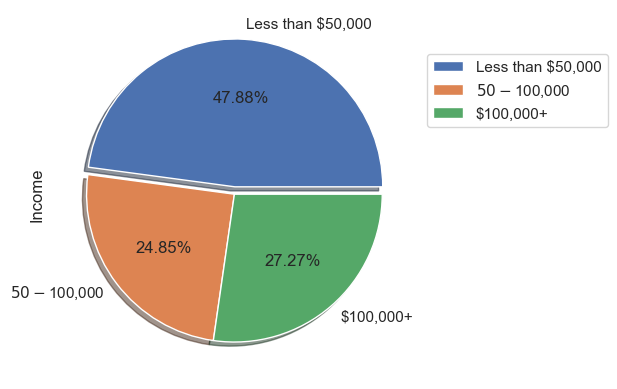

In [582]:
# Income groups
# 1 = Less than $50,000; 2 = $50-$100,000; 3 = $100,000+

Income_gp = Films.groupby(by='Income')[['Income']].count()
Income_gp.plot(kind='pie',y='Income',labels=['Less than $50,000','$50-$100,000', '$100,000+'],autopct='%1.2f%%',shadow=True,explode=[0.05,0.0,0.0])
plt.legend(bbox_to_anchor =(1,0.9))
plt.show()

*Customers of Film on the Rocks fit the following demographic profile:*

*1. There are 36.69% men and 63.31% women.*

*2. There are 31.65% married people and 68.35% unmarried people.*

*3. The age groups of 13–30 (51.44%) and 31–60 (31.05%) years account for nearly 82.49% of the people.*

*4. Nearly 46.04 percent of persons earn less than $50,000.*

### d) In what media outlet(s) should the film series be advertised?

In [583]:
Films.columns

Index(['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

In [585]:
Films.Hear_About.value_counts()

5      233
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: Hear_About, dtype: int64

In [586]:
# most of them are having 5 hear about so replacing them to 5
Films.Hear_About.replace({'2,5':'5','3,5':'5','1,5':'5','4,5':'5','3,4':'5','5,4':'5'}, inplace=True)

In [587]:
Films.Hear_About.value_counts()

5    241
4     41
1     22
3     14
2     12
Name: Hear_About, dtype: int64

In [588]:
# Now changing the datatype to float
Films['Hear_About'] = Films.Hear_About.astype(float)

In [589]:
Films.Hear_About.dtypes

dtype('float64')

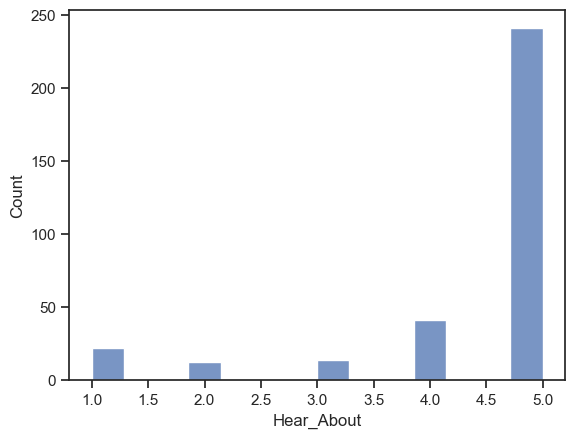

In [590]:
# 1 = television; 2 = newspaper; 3 = radio; 4 = website; 5 = word of mouth
sns.histplot(Films.Hear_About)
plt.show()

*From the given data, we know that 1 = television, 2 = newspaper, 3 = radio, 4 = website, 5 = word of mouth*

*we can see from above plot that the 'word of mouth' i.e. 5.0 is having highest frequency but it does not comes under media outlet*

*So, we'll go with the second one which is 4.0 i.e. 'website'*

*Therefore, film series should be advertised through website.*

